### IMPORTS

In [174]:
#Sentiment Analysis Imports
import os
import tweepy
import textblob
import time
import re
from tweepy import OAuthHandler
from textblob import TextBlob
from datetime import datetime
import matplotlib.pyplot as plt
import requests, json
from time import sleep

#Bollinger Band Imports
from time import sleep
import krakenex
import requests
import pandas as pd
from pykrakenapi import KrakenAPI
import plotly.graph_objects as go
import plotly.express as px

# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tkinter as tk

### BITCOIN SENTIMENT ANALYSIS - TWITTER API

In [175]:
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        
        # keys and tokens from the Twitter Dev Console
        consumer_key = ' '
        consumer_secret = ' '
        access_token = ' '
        access_token_secret = ' '
  

        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")

    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def tweet_file(self):
        self.message="Sentiment Analysis by @BlockchainEng"
        self.filename='SentimentAnalysis.png'
        print(self)
        self.api.update_with_media(message = self.message, filename= self.filename)

    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []

        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)

            # parsing tweets one by one
            list_of_tweets = []
            for tweet in fetched_tweets:

                # empty dictionary to store required params of a tweet
                parsed_tweet = {}

                # saving text of tweet
                #tweet1 =
                #tweet1=TwitterClient.api.clean_tweet(tweet_text)
                parsed_tweet['text'] = tweet.text
                list_of_tweets.append(tweet.text)
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)

            # return parsed tweets
            with open('TweetHistory.txt', 'a+') as f1:
                for tweet in list_of_tweets:
                    try:
                        f1.write(tweet)
                    except:
                        pass

            return tweets

        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))


def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    search_term = 'Bitcoin'
    list_coins=['Bitcoin'] #, 'Ethereum', 'EOS', 'Cryptocurrency', 'Blockchain', 'BTC'] #'Donald Trump', 'Barack Obama', 'George Washington']
    count1=200
    list_coin_val = []
    start_time = datetime.now()
    try:
        for i in range(0,1):
            #This For Loop controls how many data 'cycles' are collected before visualization and tweeting
            for coin in list_coins:
                tweets = api.get_tweets(query = coin, count = count1)

                # picking positive tweets from tweets
                ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
                # percentage of positive tweets
                print("\n\nTime: {}".format(str(datetime.now())))
                print("Sentiment Values for {}\nNumber of Tweets Analyzed: {}".format(coin, count1))
                positive_tweet_percentage = round(100*len(ptweets)/len(tweets),6)
                print("Positive tweets percentage: {} %".format(positive_tweet_percentage))
                # picking negative tweets from tweets
                ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
                # percentage of negative tweets
                negative_tweet_percentage = round(100*len(ntweets)/len(tweets),6)
                print("Negative tweets percentage: {} %".format(negative_tweet_percentage))
        return positive_tweet_percentage, negative_tweet_percentage
    except:
        print("ERROR - COLLECTING DATA")

In [176]:
def save_to_file(coin, positive_tweet_percentage, negative_tweet_percentage, neutral_tweet_percentage, time, current_price, filename = "SentimentHistorical.csv"):
    with open(filename, 'a+') as  f:
        line = coin, positive_tweet_percentage, negative_tweet_percentage, neutral_tweet_percentage, time, current_price
        f.writelines(str(line) + '\n')

In [177]:
### TRADE & VISUALIZATION

In [178]:
def getBitcoinPrice():
    URL = 'https://www.bitstamp.net/api/ticker/'
    try:
        r = requests.get(URL)
        priceFloat = float(json.loads(r.text)['last'])
        return priceFloat
    except requests.ConnectionError:
        print("Error querying Bitstamp API")
        
def tweet_file(self, message, filename):
    self.api.update_with_media(message, filename)
    
def historic_data_viz(self):
    #Load Historic Data and Visual into graph form for entire recorded amount
    historic_data_list = []
    i=0
    with open('SentimentHistorical.csv') as f1:
        lines = list(f1.readlines())
        for line in lines:
            print(line)
            data=list(line.split(','))
            print(data)
            if i==0:
                start_time=data[5]
            if i==len(f1.readlines()):
                end_time=data[5]
            historic_data_list.append(data)
            i+=1
    data_visualize(historic_data_list, start_time, end_time, self)

def trading(current_price, positive_sentiment_percent, negative_sentiment_percent):
    print("Positive Sentiment - Negative Sentiment (Net Positive)", positive_sentiment_percent-negative_sentiment_percent)
    if positive_sentiment_percent>1.5*negative_sentiment_percent:
        #Buy
        #use Khal's Code to place order, entries & exits
        print("TEST - BUY SIGNAL")
        pass
    if negative_sentiment_percent>1.5*positive_sentiment_percent:
        #Sell
        print("TEST - SELL SIGNAL")
        #use Khal's Code to place order, entries & exits
        pass

In [179]:
positive_tweet_percentage, negative_tweet_percentage = main()



Time: 2021-06-12 03:23:36.615488
Sentiment Values for Bitcoin
Number of Tweets Analyzed: 200
Positive tweets percentage: 36.111111 %
Negative tweets percentage: 15.277778 %


## TECHNICAL ANALYSIS - KRAKEN API

In [180]:
# Code Ref: https://github.com/IgorWounds/Kraken-API---A-Complete-Guide-Algotrading101/blob/main/Kraken%20Public%20Endpoints.ipynb

In [181]:
# Set API keys and secret
api = krakenex.API()
k = KrakenAPI(api)
#api.load_key('KrakenPass.txt')

In [182]:
# Get asset info
data = k.get_asset_info()

In [183]:
# Get prices
ticker = k.get_ticker_information('BTCUSD')

public call frequency exceeded (seconds=0.252853) 
 sleeping for 5 seconds


In [184]:
data1 = requests.get('https://api.kraken.com/0/public/Assets').json()

In [185]:
#Create Bitcoin Closing Price Dataframe
ohlc = k.get_ohlc_data('BTCUSD', interval=1440, ascending = True)
# Drop NAs (Should we replace NAs?)
ohlc[0]['close'] = ohlc[0]['close'].dropna()
ohlc[0].tail()

public call frequency exceeded (seconds=0.342799) 
 sleeping for 5 seconds


,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-06-08,1623110400,33578.6,34059.4,31017.4,33420.0,32712.0,10548.326943,72896
2021-06-09,1623196800,33409.7,37500.0,32420.4,37396.4,34956.4,9357.472109,65863
2021-06-10,1623283200,37398.9,38399.0,35803.7,36678.4,37034.3,7733.100593,56255
2021-06-11,1623369600,36684.5,37654.3,35952.7,37322.2,37016.7,5218.296832,37956
2021-06-12,1623456000,37322.2,37449.5,35031.4,35423.2,35974.7,2446.146619,16359


---

### Construct Bollinger Band (Trading Signal)

In [186]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
ohlc[0]['bollinger_mid_band'] = ohlc[0]['close'].rolling(window=bollinger_window).mean()
ohlc[0]['bollinger_std'] = ohlc[0]['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
ohlc[0]['bollinger_upper_band']  = ohlc[0]['bollinger_mid_band'] + (ohlc[0]['bollinger_std'] * 1)
ohlc[0]['bollinger_lower_band']  = ohlc[0]['bollinger_mid_band'] - (ohlc[0]['bollinger_std'] * 1)

# Calculate bollinger band trading signal
ohlc[0]['bollinger_long'] = np.where(ohlc[0]['close'] < ohlc[0]['bollinger_lower_band'], 1.0, 0.0)
ohlc[0]['bollinger_short'] = np.where(ohlc[0]['close'] > ohlc[0]['bollinger_upper_band'], -1.0, 0.0)
ohlc[0]['bollinger_signal'] = ohlc[0]['bollinger_long'] + ohlc[0]['bollinger_short']
ohlc[0]['bollinger_signal'].tail()

dtime
2021-06-08    1.0
2021-06-09    0.0
2021-06-10    0.0
2021-06-11    0.0
2021-06-12    0.0
Freq: 1440T, Name: bollinger_signal, dtype: float64

<AxesSubplot:xlabel='dtime'>

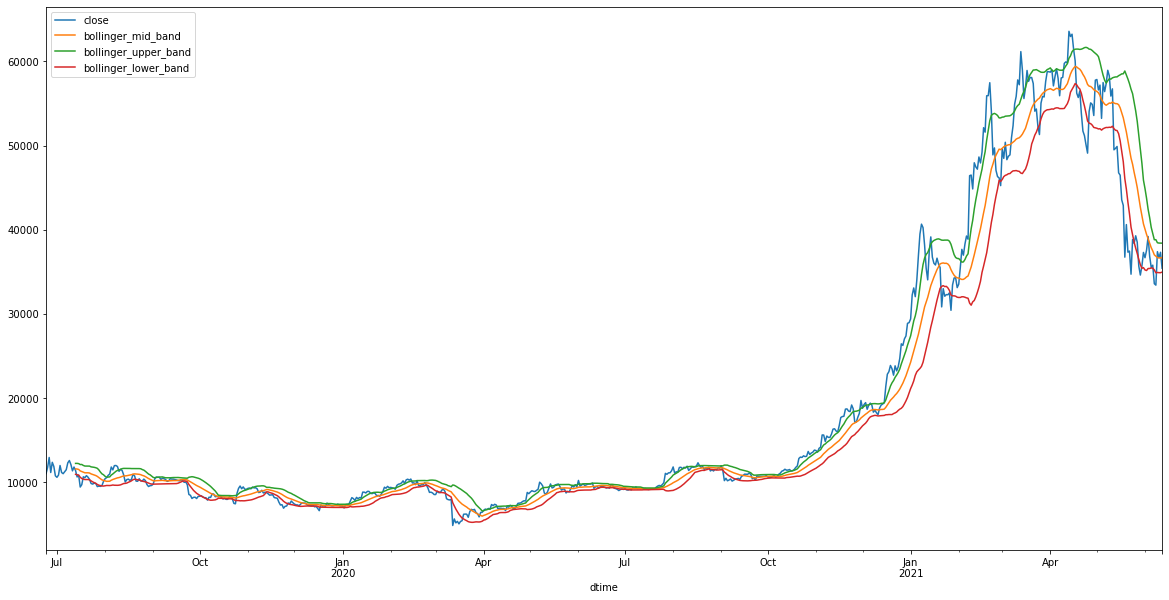

In [187]:
# Plot the Bollinger Bands for BTC/USD closing prices
ohlc[0][['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [188]:
# Defining Get Genie Decision function
def get_genie_decision(bollinger_signal, sentiment_signal):
    if bollinger_signal == 1 and sentiment_signal == 1:
        genie_decision = "It's a good time to BUY! Why? Because BITCOIN is UNDERVALUED and TWITTER is BULLISH on Bitcoin!"
    elif bollinger_signal == 1 and sentiment_signal == 0:
        genie_decision = "It's a good time to BUY! Why? Because BITCOIN is UNDERVALUED and TWITTER IS NEUTRAL ON BITCOIN!"
    elif bollinger_signal == 1 and sentiment_signal == -1:
        genie_decision = "It's a good time to SELL! Why? Because EVEN THOUGH BITCOIN IS UNDERVALUED, TWITTER IS BEARISH ON BITCOIN!"
    elif bollinger_signal == 0 and sentiment_signal == 1:
        genie_decision = "It's a good time to BUY! Why? Because EVEN THOUGH BITCOIN IS NOT UNDERVALUED, TWITTER IS BULLISH ON BITCOIN!"
    elif bollinger_signal == 0 and sentiment_signal == 0:
        genie_decision = "It's a good time to HODL! Why? Because Bitcoin is neither overvalued nor undervalued and Twitter is neutral on Bitcoin!"
    elif bollinger_signal == 0 and sentiment_signal == -1:
        genie_decision = "It's a good time to SELL! Why? Because EVEN THOUGH BITCOIN IS NOT OVERVALUED, TWITTER IS BEARISH ON BITCOIN!"
    elif bollinger_signal == -1 and sentiment_signal == 1:
        genie_decision = "It's a good time to BUY! Why? Because EVEN THOUGH BITCOIN IS OVERVALUED, TWITTER IS BULLISH ON BITCOIN!"
    elif bollinger_signal == -1 and sentiment_signal == 0:
        genie_decision = "It's a good time to SELL! Why? Because BITCOIN IS OVERVALUED AND TWITTER IS NEUTRAL ON BITCOIN!"
    else: #bollinger_signal == -1 and sentiment_signal == -1
        genie_decision = "It's a good time to SELL! Why? Because BITCOIN IS OVERVALUED AND TWITTER IS BEARISH ON BITCOIN!"
    
    return genie_decision

In [189]:
# Defining OHLC update function
def ohlc_update():
    ohlc = k.get_ohlc_data('BTCUSD', interval=1440, ascending = True)
    ohlc[0]['close'] = ohlc[0]['close'].dropna()
    # Set bollinger band window
    bollinger_window = 20

    # Calculate rolling mean and standard deviation
    ohlc[0]['bollinger_mid_band'] = ohlc[0]['close'].rolling(window=bollinger_window).mean()
    ohlc[0]['bollinger_std'] = ohlc[0]['close'].rolling(window=20).std()

    # Calculate upper and lowers bands of bollinger band
    ohlc[0]['bollinger_upper_band']  = ohlc[0]['bollinger_mid_band'] + (ohlc[0]['bollinger_std'] * 1)
    ohlc[0]['bollinger_lower_band']  = ohlc[0]['bollinger_mid_band'] - (ohlc[0]['bollinger_std'] * 1)

    # Calculate bollinger band trading signal
    ohlc[0]['bollinger_long'] = np.where(ohlc[0]['close'] < ohlc[0]['bollinger_lower_band'], 1.0, 0.0)
    ohlc[0]['bollinger_short'] = np.where(ohlc[0]['close'] > ohlc[0]['bollinger_upper_band'], -1.0, 0.0)
    ohlc[0]['bollinger_signal'] = ohlc[0]['bollinger_long'] + ohlc[0]['bollinger_short']
    #print("ohlc updated")
    print(ohlc[0]['bollinger_signal'][-1])
    
ohlc_update()


0.0


In [190]:
# Defining Get Sentiment Signal Function
def get_sentiment_signal():
    positive_tweet_percentage, negative_tweet_percentage = main()
    if positive_tweet_percentage > 50:
        sentiment_signal = 1
    elif negative_tweet_percentage > 50:
        sentiment_signal = -1
    else: sentiment_signal = 0
    return sentiment_signal

get_sentiment_signal()



Time: 2021-06-12 03:23:51.823247
Sentiment Values for Bitcoin
Number of Tweets Analyzed: 200
Positive tweets percentage: 29.72973 %
Negative tweets percentage: 16.216216 %


0

In [191]:
# Defining Ask Genie Function
def ask_genie():
    print("running genie")
    ohlc_update()
    sentiment_signal = get_sentiment_signal()
    bollinger_signal = ohlc[0]['bollinger_signal'][-1]
    #tk.messagebox.showinfo("Bitcoin Genie Says", get_genie_decision(bollinger_signal, sentiment_signal))
    return get_genie_decision(bollinger_signal, sentiment_signal)
ask_genie()

running genie
0.0


Time: 2021-06-12 03:23:52.887252
Sentiment Values for Bitcoin
Number of Tweets Analyzed: 200
Positive tweets percentage: 28.767123 %
Negative tweets percentage: 16.438356 %


"It's a good time to HODL! Why? Because Bitcoin is neither overvalued nor undervalued and Twitter is neutral on Bitcoin!"

In [192]:
# Building User Interface using Tkinter
root = tk.Tk()
root.geometry('500x500')
root.title("Bitcoin Genie")

label_0 = tk.Label(root, text="Bitcoin Genie",width=20,font=("bold", 36))
label_0.place(x=-40,y=53)

label_1 = tk.Label(root, text="“I can tell you whether to buy, hold, or sell Bitcoin at this moment”",width=60,font=("bold", 12))
label_1.place(x=-20,y=110)

label_2 = tk.Label(root, text="DISCLAIMER: THIS IS NOT FINANCIAL ADVICE!",width=60,font=("bold", 12))
label_2.place(x=-20,y=450)

def button_press():
    label_response = tk.Text(root, height=3, width=50)
    label_response.pack()
    #label_response.insert(tk.END,"")
    label_response.config(state="disabled")
    label_response.place(x=50,y=250)
    response = ask_genie()
    label_response.config(state="normal")
    label_response.insert(tk.END,ask_genie())
    label_response.config(state="disabled")

b1=tk.Button(root,text="Ask ME!",font=("bold", 20),height=2,width=10,bg='blue',fg='white', command=button_press)
b1.place(x=170,y=150)

tk.mainloop()

running genie
0.0


Time: 2021-06-12 03:23:56.622428
Sentiment Values for Bitcoin
Number of Tweets Analyzed: 200
Positive tweets percentage: 31.944444 %
Negative tweets percentage: 15.277778 %
running genie
0.0


Time: 2021-06-12 03:23:57.722779
Sentiment Values for Bitcoin
Number of Tweets Analyzed: 200
Positive tweets percentage: 31.944444 %
Negative tweets percentage: 15.277778 %
